# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='int32')

Plot the training data

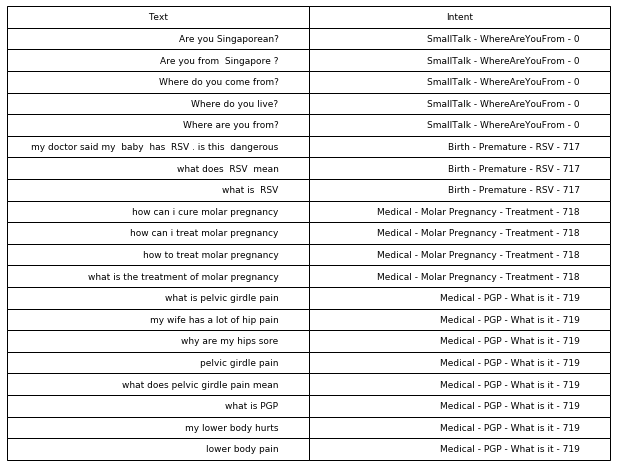

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.4.1'

Start training the classification model and save

In [8]:
from text_classification.ensemble.model import EnsembleWrapper
from text_classification.ensemble.train import EnsembleLearner
from common.callbacks import PrintLoggerCallback

model = EnsembleWrapper({'num_classes': num_classes})
learner = EnsembleLearner(model)

In [9]:
learner.fit(
    training_data=(X_train, y_train),
    batch_size=64
)

Iteration 1, loss = 7.14273467
Iteration 2, loss = 6.75439933
Iteration 3, loss = 6.31520806
Iteration 4, loss = 5.71898866
Iteration 5, loss = 5.06071456
Iteration 6, loss = 4.40920670
Iteration 7, loss = 3.80930200
Iteration 8, loss = 3.28064948
Iteration 9, loss = 2.83212182
Iteration 10, loss = 2.45739850
Iteration 11, loss = 2.14818732
Iteration 12, loss = 1.89070009
Iteration 13, loss = 1.68238788
Iteration 14, loss = 1.50407591
Iteration 15, loss = 1.35893655
Iteration 16, loss = 1.23766277
Iteration 17, loss = 1.13251286
Iteration 18, loss = 1.04429650
Iteration 19, loss = 0.96692091
Iteration 20, loss = 0.90076850
Iteration 21, loss = 0.84273384
Iteration 22, loss = 0.78974498
Iteration 23, loss = 0.74586220
Iteration 24, loss = 0.70504447
Iteration 25, loss = 0.66830619
Iteration 26, loss = 0.63539154
Iteration 27, loss = 0.60388999
Iteration 28, loss = 0.57669635
Iteration 29, loss = 0.55351192
Iteration 30, loss = 0.52990599
Iteration 31, loss = 0.50863385
Iteration 32, los

In [10]:
torch.topk(model(['good morning!']), 50)

(tensor([[7.5643e-01, 2.3872e-01, 1.8488e-03, 1.6870e-03, 6.8521e-04, 2.7477e-04,
          1.5278e-04, 1.4638e-04, 1.8052e-05, 8.9853e-06, 5.5559e-06, 5.2235e-06,
          5.1837e-06, 3.0688e-06, 2.8462e-06, 1.7612e-06, 1.2752e-06, 9.2459e-07,
          8.7125e-07, 6.4113e-07, 5.3042e-07, 4.8468e-07, 4.6426e-07, 4.1409e-07,
          2.9974e-07, 2.9108e-07, 2.6330e-07, 2.2029e-07, 2.1823e-07, 1.5968e-07,
          1.4038e-07, 1.2839e-07, 1.1103e-07, 9.6443e-08, 9.6428e-08, 7.9236e-08,
          7.6953e-08, 7.1503e-08, 6.5769e-08, 6.5031e-08, 6.0045e-08, 5.9547e-08,
          4.7633e-08, 4.4414e-08, 4.1213e-08, 3.7480e-08, 3.3668e-08, 3.1318e-08,
          2.9860e-08, 2.6421e-08]]),
 tensor([[ 707,  642,  289,   95,  946,  180, 1160,  696,  305,  314, 1107,  856,
            69, 1127,  810, 1381,  491, 1134,  927,  162,  283,   39, 1147,   96,
           736, 1397,  552,  554,  981, 1157, 1034, 1325,  546, 1321,  807,  244,
           976, 1234, 1100,  646,   83,  419,  929,  958, 140

In [11]:
model(['the earth is flat'])

tensor([[1.4099e-07, 4.7093e-07, 5.8813e-09,  ..., 3.3552e-09, 3.0408e-08,
         3.5479e-05]])

In [12]:
classes[23]

'Medical - ThyroidDisorder - What is'